In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tabulate
import seaborn as sns

In [ ]:
#get path from Files in colab itself
path = '/content/drive/MyDrive/Colab Notebooks/Fraud.csv'
dataset = pd.read_csv(path)

In [ ]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
dataset.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4488387,324,CASH_OUT,128557.07,C1040781290,0.00,0.00,C1500345143,213498.54,342055.62,0,0
743526,38,CASH_IN,189728.05,C474255423,2042646.28,2232374.33,C1862380526,2368386.59,2178658.53,0,0
4157734,303,CASH_IN,82288.69,C841407383,214205.77,296494.46,C1566537681,2664335.37,2582046.67,0,0
4661460,330,CASH_IN,139103.79,C2065857366,795132.01,934235.80,C1269218578,356713.17,217609.38,0,0
822537,40,CASH_OUT,131905.58,C1949938631,467597.14,335691.56,C1875251085,2065132.74,2197038.32,0,0


In [ ]:
dataset.shape

(6362620, 10)



*   Dataset has 6362620 observations and 10 features
*   'isFlaggedFraud' column not needed so we're dropping it



In [ ]:
dataset.drop('isFlaggedFraud' , axis = 1 , inplace = True)

dataset.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
4160996,304,PAYMENT,37880.43,C1904083113,0.00,0.00,M1516599604,0.00,0.00,0
5208493,370,PAYMENT,77817.39,C204555119,303802.11,225984.72,M1083948929,0.00,0.00,0
1740344,161,CASH_IN,90365.67,C1097182080,10571356.40,10661722.07,C969901569,907547.80,817182.14,0
5171736,358,CASH_OUT,290198.52,C1362738408,0.00,0.00,C1354259857,1334759.68,1624958.20,0
4041399,299,TRANSFER,962285.48,C540130633,0.00,0.00,C838850467,1687141.64,2649427.12,0


In [ ]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64



*   Dataset has no null values


In [ ]:
table  = [['amount',dataset['amount'].min(),dataset['amount'].max()],
          ['oldbalanceOrg', dataset.oldbalanceOrg.min(), dataset.oldbalanceOrg.max()],
          ['newbalanceOrig', dataset.newbalanceOrig.min(), dataset.newbalanceOrig.max()],
          ['oldbalanceDest', dataset.oldbalanceDest.min(), dataset.oldbalanceDest.max()],
          ['isFraud', dataset.isFraud.min(), dataset.isFraud.max()]]

print(tabulate.tabulate_formats)
print(tabulate.tabulate(table,headers = ['Columns','MaxValue','Minvalue'],tablefmt = 'fancy_grid',numalign = 'right'))

['asciidoc', 'double_grid', 'double_outline', 'fancy_grid', 'fancy_outline', 'github', 'grid', 'heavy_grid', 'heavy_outline', 'html', 'jira', 'latex', 'latex_booktabs', 'latex_longtable', 'latex_raw', 'mediawiki', 'mixed_grid', 'mixed_outline', 'moinmoin', 'orgtbl', 'outline', 'pipe', 'plain', 'presto', 'pretty', 'psql', 'rounded_grid', 'rounded_outline', 'rst', 'simple', 'simple_grid', 'simple_outline', 'textile', 'tsv', 'unsafehtml', 'youtrack']
╒════════════════╤════════════╤═════════════╕
│ Columns        │   MaxValue │    Minvalue │
╞════════════════╪════════════╪═════════════╡
│ amount         │          0 │ 9.24455e+07 │
├────────────────┼────────────┼─────────────┤
│ oldbalanceOrg  │          0 │  5.9585e+07 │
├────────────────┼────────────┼─────────────┤
│ newbalanceOrig │          0 │  4.9585e+07 │
├────────────────┼────────────┼─────────────┤
│ oldbalanceDest │          0 │ 3.56016e+08 │
├────────────────┼────────────┼─────────────┤
│ isFraud        │          0 │           

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
#Downcasting numerical columns
for column in dataset.columns:
  if dataset[column].dtype == 'float64':
    #dataset[column] = pd.to_numeric(dataset[column],downcast='float')
    #For some reason above code doesn't change dtype it remains float64
    dataset[column] = dataset[column].astype('float32')
  elif dataset[column].dtype == 'int64':
    dataset[column] = pd.to_numeric(dataset[column],downcast = 'unsigned')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            uint16 
 1   type            object 
 2   amount          float32
 3   nameOrig        object 
 4   oldbalanceOrg   float32
 5   newbalanceOrig  float32
 6   nameDest        object 
 7   oldbalanceDest  float32
 8   newbalanceDest  float32
 9   isFraud         uint8  
dtypes: float32(5), object(3), uint16(1), uint8(1)
memory usage: 285.2+ MB


In [ ]:
dataset.duplicated().sum()

0

*   There are no duplicate items



UNIVARIATE DATA VISUALIZATION

Text(0, 0.5, 'Number of transactions')

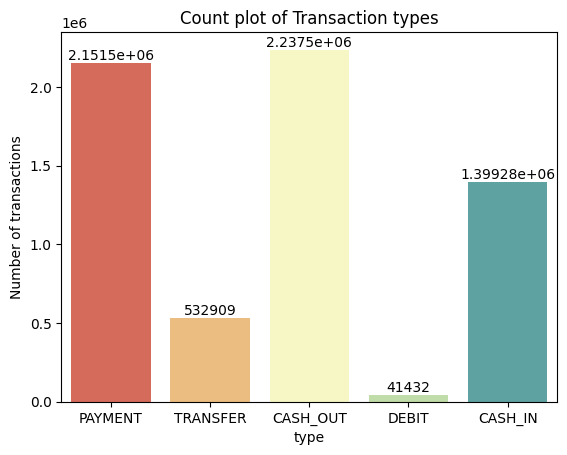

In [ ]:
ax = sns.countplot(x='type',data=dataset,palette='Spectral')
for container in ax.containers:
  ax.bar_label(container)
plt.title('Count plot of Transaction types')
plt.ylabel('Number of transactions')



*   CASH-OUT is the most frequent type of transaction followed by Payment,
 Cash-in, Transfer, Debit





Text(0.5, 0, 'isFraud  (0-> Non Fradulent 1-> Fradulent)')

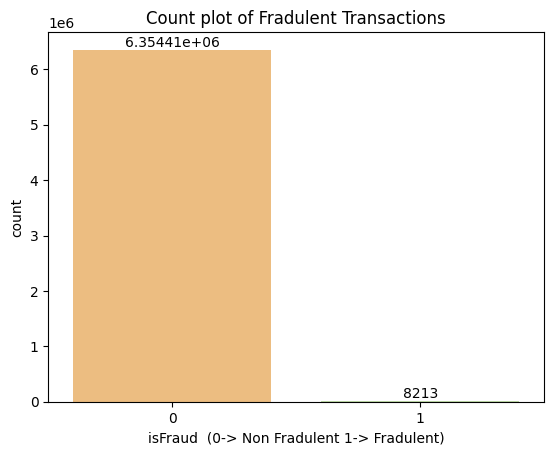

In [ ]:
ax = sns.countplot(x='isFraud',data=dataset,palette='Spectral')
for container in ax.containers:
  ax.bar_label(container)
plt.title('Count plot of Fradulent Transactions')
plt.xlabel('isFraud  (0-> Non Fradulent 1-> Fradulent)')




* There are more non-fradulent transactions then fradulent transactions
* There are about 8213 Fradulent transactions




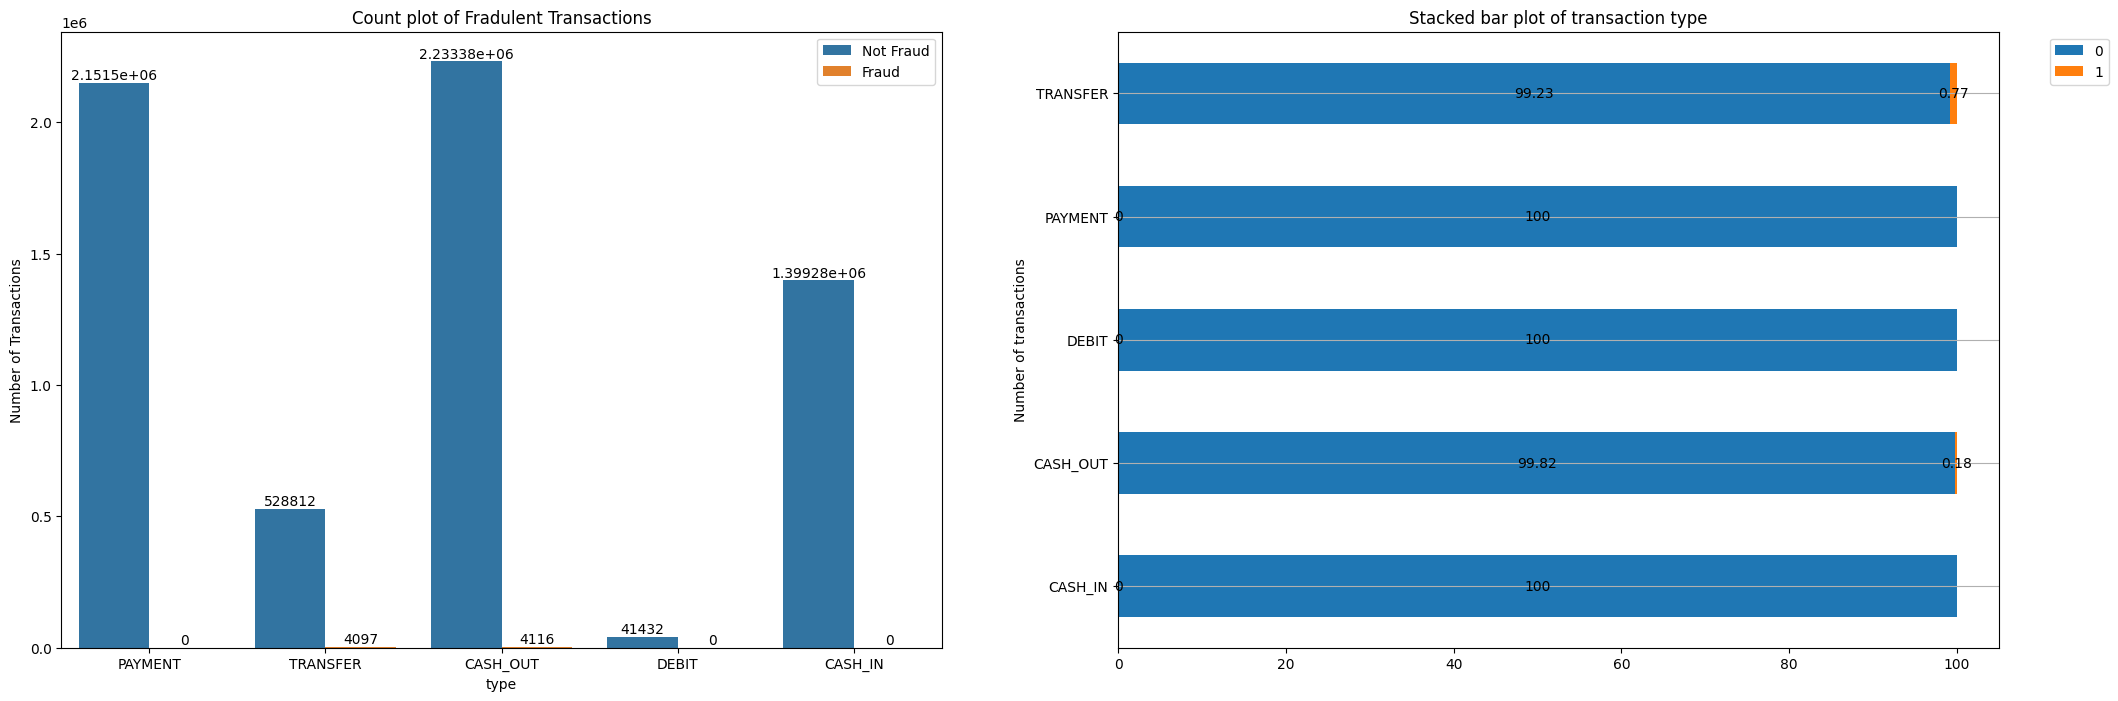

In [ ]:
fig , ax = plt.subplots(1,2,figsize = (25,8))
sns.countplot(x='type',data = dataset,hue='isFraud',ax=ax[0])
for container in ax[0].containers:
  ax[0].bar_label(container)
ax[0].set_ylabel('Number of Transactions')
ax[0].set_title('Count plot of Fradulent Transactions')
ax[0].legend(labels=['Not Fraud','Fraud'],loc='best')

df = dataset.groupby(['type','isFraud']).size().unstack()
df.fillna(0).apply(lambda x : round(x/sum(x)*100,2),axis = 1).plot(kind='barh',stacked=True,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Stacked bar plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')



*   Fraudulent Transactions occur only in CASH_OUT and TRANSFER type transactions
* Frequency is most in CASH_OUT followed by TRANSFER type transactions



In [ ]:
print(df)
print(df.fillna(0).apply(lambda x : round(x/sum(x)*100,2),axis=1))

isFraud           0       1
type                       
CASH_IN   1399284.0     NaN
CASH_OUT  2233384.0  4116.0
DEBIT       41432.0     NaN
PAYMENT   2151495.0     NaN
TRANSFER   528812.0  4097.0
isFraud        0     1
type                  
CASH_IN   100.00  0.00
CASH_OUT   99.82  0.18
DEBIT     100.00  0.00
PAYMENT   100.00  0.00
TRANSFER   99.23  0.77


Text(0, 0.5, 'Number of transactions')

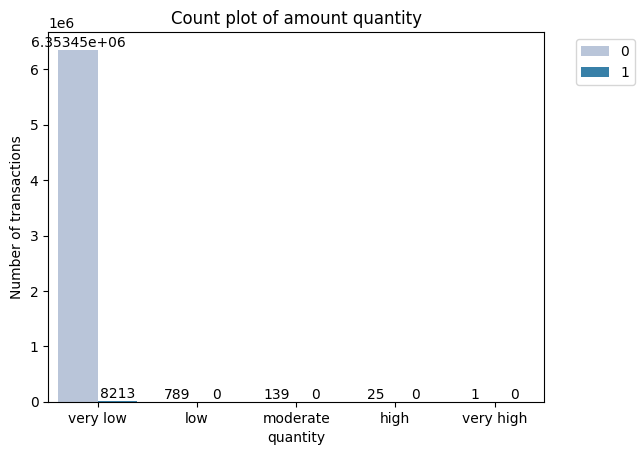

In [ ]:
dataset['quantity'] = pd.cut(dataset['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=dataset, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')


*   All fraudulent transactions fall into the category of very low amounts.
*   This suggests that in most cases, small transactions are more prone to fraudulent transactions item

